## 1. How many accidents occurred in each state?
## 2. Which states have the highest and lowest number of accidents?

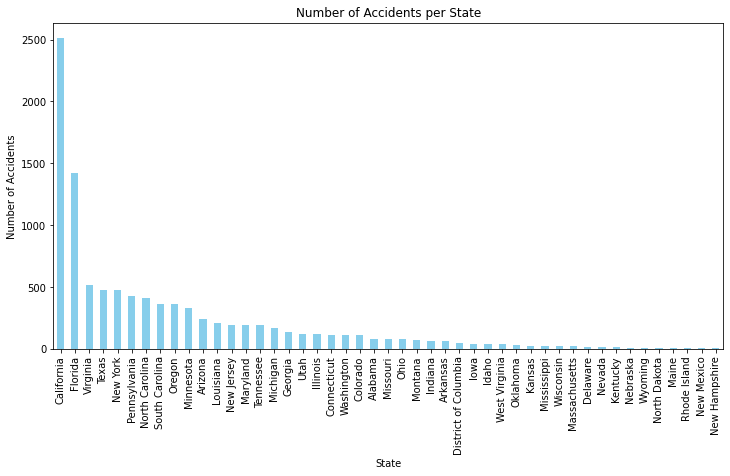

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import pandas as pd
import json

file_path = "../../3. Data Cleaning/cleaned_accidents.csv"

# Read the CSV file
data = pd.read_csv(file_path)

state_full_names = {
    'CA': 'California',
    'FL': 'Florida',
    'VA': 'Virginia',
    'TX': 'Texas',
    'NY': 'New York',
    'PA': 'Pennsylvania',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'OR': 'Oregon',
    'MN': 'Minnesota',
    'AZ': 'Arizona',
    'LA': 'Louisiana',
    'NJ': 'New Jersey',
    'MD': 'Maryland',
    'TN': 'Tennessee',
    'MI': 'Michigan',
    'GA': 'Georgia',
    'UT': 'Utah',
    'IL': 'Illinois',
    'CT': 'Connecticut',
    'WA': 'Washington',
    'CO': 'Colorado',
    'AL': 'Alabama',
    'MO': 'Missouri',
    'OH': 'Ohio',
    'MT': 'Montana',
    'IN': 'Indiana',
    'AR': 'Arkansas',
    'DC': 'District of Columbia',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'WV': 'West Virginia',
    'OK': 'Oklahoma',
    'KS': 'Kansas',
    'MS': 'Mississippi',
    'WI': 'Wisconsin',
    'MA': 'Massachusetts',
    'DE': 'Delaware',
    'NV': 'Nevada',
    'KY': 'Kentucky',
    'NE': 'Nebraska',
    'WY': 'Wyoming',
    'ND': 'North Dakota',
    'ME': 'Maine',
    'RI': 'Rhode Island',
    'NM': 'New Mexico',
    'NH': 'New Hampshire'
}

state_accidents = data['State'].value_counts()

state_accidents_full = state_accidents.rename(state_full_names)

state_accidents_full.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Accidents per State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# Group the data by 'State' to get the accident count per state
state_accidents = data['State'].value_counts().reset_index()
state_accidents.columns = ['State', 'Accident_Count']

# Dictionary to store latitude and longitude of state centroids (for marker placement)
state_centroids = {
    'CA': [36.7783, -119.4179],  # California
    'FL': [27.9947, -81.7603],  # Florida
    'VA': [37.4316, -78.6569],  # Virginia
    'TX': [31.9686, -99.9018],  # Texas
    'NY': [40.7128, -74.0060],  # New York
    'PA': [41.2033, -77.1945],  # Pennsylvania
    'NC': [35.7596, -79.0193],  # North Carolina
    'SC': [33.8361, -81.1637],  # South Carolina
    'OR': [43.8041, -120.5542],  # Oregon
    'MN': [46.7296, -94.6859],  # Minnesota
    'AZ': [34.0489, -111.0937],  # Arizona
    'LA': [30.9843, -91.9623],  # Louisiana
    'NJ': [40.0583, -74.4057],  # New Jersey
    'MD': [39.0458, -76.6413],  # Maryland
    'TN': [35.5175, -86.5804],  # Tennessee
    'MI': [44.3148, -85.6024],  # Michigan
    'GA': [33.7490, -84.3880],  # Georgia
    'UT': [40.1135, -111.8636],  # Utah
    'IL': [40.6331, -89.3985],  # Illinois
    'CT': [41.6032, -73.0877],  # Connecticut
    'WA': [47.7511, -120.7401],  # Washington
    'CO': [39.5501, -105.7821],  # Colorado
    'AL': [32.8067, -86.7911],  # Alabama
    'MO': [37.9643, -91.8318],  # Missouri
    'OH': [40.4173, -82.9071],  # Ohio
    'MT': [46.8797, -110.3626],  # Montana
    'IN': [40.2670, -86.1349],  # Indiana
    'AR': [34.7465, -92.2896],  # Arkansas
    'DC': [38.9072, -77.0369],  # District of Columbia
    'IA': [41.8780, -93.0977],  # Iowa
    'ID': [44.0682, -114.7420],  # Idaho
    'WV': [38.5976, -80.4549],  # West Virginia
    'OK': [35.4676, -97.5164],  # Oklahoma
    'KS': [39.0119, -98.4842],  # Kansas
    'MS': [32.3547, -89.3985],  # Mississippi
    'WI': [43.7844, -88.7879],  # Wisconsin
    'MA': [42.4072, -71.3824],  # Massachusetts
    'DE': [38.9108, -75.5277],  # Delaware
    'NV': [38.8026, -116.4194],  # Nevada
    'KY': [37.8393, -84.2700],  # Kentucky
    'NE': [41.1254, -98.2681],  # Nebraska
    'WY': [43.0759, -107.2903],  # Wyoming
    'ND': [47.5515, -101.0020],  # North Dakota
    'ME': [44.2998, -69.4495],  # Maine
    'RI': [41.6809, -71.5118],  # Rhode Island
    'NM': [34.5199, -105.8701],  # New Mexico
    'NH': [43.1939, -71.5724]   # New Hampshire
}

# Create a map centered around the USA
m = folium.Map([37.0902, -95.7129], zoom_start=5)

# Loop through the grouped data to add markers for each state
for _, row in state_accidents.iterrows():
    state = row['State']
    accident_count = row['Accident_Count']

    # Use state centroid to place marker (ensure state is in the dictionary)
    if state in state_centroids:
        lat, lon = state_centroids[state]

        # Customize the marker size and color based on accident count
        marker_color = 'red' if accident_count > 1000 else 'orange'
        marker_radius = 10 + (accident_count / 100)  # Adjust radius for visibility

        # Add CircleMarker for state with accident count
        folium.CircleMarker(
            location=[lat, lon],
            radius=marker_radius,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f"{state}: {accident_count} accidents",
            tooltip=f"Accidents: {accident_count}"  
        ).add_to(m)

# Save to HTML file if needed
m.save('accidents_per_state_map.html')

# Display the map (in Jupyter)
m

In [3]:
# Create a map centered around the USA
m = folium.Map([37.0902, -95.7129], zoom_start=5)

# Loop through the grouped data to add markers for each state
for _, row in state_accidents.iterrows():
    state = row['State']
    accident_count = row['Accident_Count']

    # Use state centroid to place marker (ensure state is in the dictionary)
    if state in state_centroids:
        lat, lon = state_centroids[state]

        # Customize the marker size and color based on accident count
        marker_color = 'red' if accident_count > 1000 else 'orange'
        marker_radius = 10 + (accident_count / 100)  # Adjust radius for visibility

        # Create the circle marker for accident count
        folium.CircleMarker(
            location=[lat, lon],
            radius=marker_radius,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
        ).add_to(m)

        # Add a marker with the accident count as the label above the circle
        folium.Marker(
            location=[lat, lon],
            popup=None,
            tooltip=None,
            # Place the accident count as text label above the circle
            icon=folium.DivIcon(
                html=f'<div style="font-size: 12px; color: black; font-weight: bold; position: relative; top: -25px;">{accident_count}</div>'
            )
        ).add_to(m)

# Save to HTML file if needed
m.save('accidents_per_state_map_with_labels.html')

# Display the map (in Jupyter)
m